In [3]:
import random

We will have a graph with nodes (intersections), edges (roads). 

Assumptions:
- random routing
- uniform car distribution?
- no time spent in intersection
- cars are terminated at nodes which have no outlet

In [4]:
class Map:
    def __init__(self, intersections, roads):
        self.intersections = intersections
        self.roads = roads

    def update(self):
        for road in self.roads:
            road.update()

class Intersection:
    def __init__(self, roads=[]):
        self.roads = roads # in ccw order ?
        self.terminations = 0

        self.get_out_roads()

    def add_road(self, road):
        self.roads.append(road)
        self.get_out_roads()

    def get_out_roads(self):
        self.out_roads = []
        for road in self.roads:
            if road.get_start() == self:
                self.out_roads.append(road)

    def route(self, in_road, num_cars, direction=None):
        if direction == None: # if direction is not None
            
            if in_road.num_cars >= num_cars:
                in_road.remove_cars(num_cars)
            else:
                in_road.num_cars = 0


            if len(self.out_roads) != 0:
                choice = random.choice(self.out_roads)
                choice.add_cars(num_cars)# choose random road
            else:
                self.terminations += num_cars
                
            # else cars just disappear




class Road:
    def __init__(self, dt, start, end, num_cars, speed_limit, length, lanes, name):
        self.dt = dt # size of time step
        self.start = start # starting intersection
        self.end = end # ending intersection
        self.num_cars = num_cars # number of cars
        self.speed_limit = speed_limit
        self.length = length # length of road
        self.lanes = lanes # number of lanes
        self.name = name
        
        self.connect()
        self.speed = 0
        self.update_speed()

    def connect(self):
        self.start.add_road(self)
        self.end.add_road(self)

    def update_speed(self):
        if self.num_cars > 0:
            self.speed =  self.speed_limit / self.num_cars
        else:
            self.speed = self.speed_limit
    
    def get_start(self):
        return self.start
    
    def update(self):
        self.end.route(in_road = self, num_cars = (self.num_cars * self.speed * self.dt)/self.length) 

        bar = ""
        for i in range(int(self.num_cars)):
            bar += "#"

        print(self.name, bar)
        # send number of cars into intersection based on uniform density of cars

    def add_cars(self, num_cars):
        self.num_cars += num_cars
    def remove_cars(self, num_cars):
        self.num_cars -= num_cars

In [5]:
delta_time = 1
inter1 = Intersection()
inter2 = Intersection()
inter3 = Intersection()
#   #---\
#   |    #------------#(4)
#   #--/
inter4 = Intersection()
road1 = Road(dt=delta_time, start=inter1, end=inter2, num_cars=20, speed_limit=100, length=100, lanes=1, name="1")
road2 = Road(dt=delta_time, start=inter2, end=inter3, num_cars=20, speed_limit=100, length=100, lanes=1, name="2")
road3 = Road(dt=delta_time, start=inter3, end=inter1, num_cars=20, speed_limit=100, length=100, lanes=1, name="3")
road4 = Road(dt=delta_time, start=inter2, end=inter4, num_cars=20, speed_limit=100, length=100, lanes=1, name="4")

In [7]:
street_map = Map(intersections = [inter1, inter2, inter3, inter4], roads=[road1, road2, road3, road4])

In [30]:
import networkx as nx

G = nx.DiGraph()

G.add_nodes_from([1,2,3,4])
G.add_edge(1, 2, dt=delta_time, num_cars=10, speed_limit=100, length=100, lanes=1, name="1")
G.add_edge(2, 3, dt=delta_time, num_cars=20, speed_limit=100, length=100, lanes=1, name="2")
G.add_edge(3, 1, dt=delta_time, num_cars=25, speed_limit=100, length=100, lanes=1, name="3")
G.add_edge(2, 4, dt=delta_time, num_cars=5, speed_limit=100, length=100, lanes=1, name="4")


In [31]:
G[1]

AtlasView({2: {'dt': 1, 'num_cars': 10, 'speed_limit': 100, 'length': 100, 'lanes': 1, 'name': '1'}})

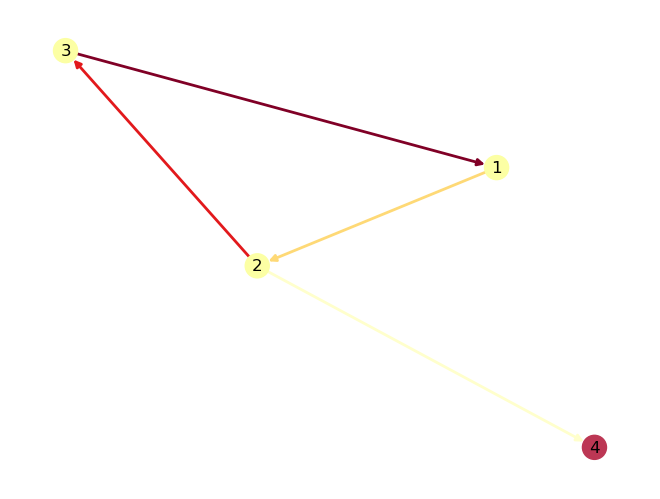

In [42]:
# Normalize weights to a color map (e.g., plt.cm.viridis)
import numpy as np
import matplotlib.cm as cm
from matplotlib import pyplot as plt

def plot_current_street_map(street_map):
    pass

# should be able to call this function after every Map.update() call and it will display the current street map

# Testing work

# Extract edge weights
num_cars = nx.get_edge_attributes(G, 'num_cars')
# Convert weights to a list and normalize them for color mapping
num_cars_values = list(num_cars.values())
norm = plt.Normalize(min(num_cars_values), max(num_cars_values))  # Normalize to [0,1]
edge_colors = [cm.YlOrRd(norm(num_cars[edge])) for edge in G.edges]

norm = plt.Normalize(0, 1)
node_colors = [cm.inferno(norm(1)), cm.inferno(norm(1)), cm.inferno(norm(1)), cm.inferno(norm(0.5))]


# Draw the graph with edge colors
pos = nx.spring_layout(G)  # Define node positions
nx.draw(G, pos, with_labels=True, edge_color=edge_colors, node_color=node_colors, width=2)

# Show the graph
plt.show()

In [10]:
street_map.update()
print("Terminations: ", inter4.terminations)

1 ###################
2 ###################
3 ###################
4 #################
Terminations:  2.8525


Next Steps:
- Make a better model wrt choosing how many cars move into the intersection (uniform distribution is bad)
- Make it easier to make a Map object (better instantiation of roads, intersections)
- Model how the next road affects the previous road
- Add visualization

In [43]:
for _ in range(10):
    street_map.update()
    print("Terminations: ", inter4.terminations)

1 ###################
2 ###################
3 ###################
4 ################
Terminations:  3.7098750000000003
1 ###################
2 ###################
3 ###################
4 ###############
Terminations:  4.52438125
1 ###################
2 ###################
3 ###################
4 ##############
Terminations:  5.2981621875
1 ###################
2 ###################
3 ###################
4 #############
Terminations:  6.033254078125
1 ###################
2 ###################
3 ###################
4 #############
Terminations:  6.73159137421875
1 ###################
2 ##################
3 ###################
4 #############
Terminations:  7.4458699473324295
1 ###################
2 ##################
3 ###################
4 ############
Terminations:  8.124434591790425
1 ###################
2 ##################
3 ###################
4 ############
Terminations:  8.769071004025522
1 ###################
2 ##################
3 ###################
4 ###########
Terminations: 